In [28]:
from bs4 import BeautifulSoup
import requests
import re
from urllib.request import urlopen
import os


def get_soup(url):
    return BeautifulSoup(requests.get(url).text)

image_type = "sunrise"
query = "sunrise"
url = "http://www.bing.com/images/search?q=" + query + "&qft=+filterui:color2-bw+filterui:imagesize-large&FORM=R5IR3"

soup = get_soup(url)
images = [a['src'] for a in soup.find_all("img", {"src": re.compile("mm.bing.net")})]

for img in images:
    raw_img = urlopen(img).read()
    cntr = len([i for i in os.listdir("images") if image_type in i]) + 1
    f = open("images/" + image_type + "_"+ str(cntr), 'wb')
    f.write(raw_img)
    f.close()

/home/vm/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import PIL
from PIL import Image
import os
import base64
from io import StringIO

In [47]:
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

In [48]:
%matplotlib inline

<h2>Importing Image Data</h2>

<h5>Create Processing Functions</h5>

In [49]:
#setup a standard image size; this will distort some images but will get everything into the same shape
STANDARD_SIZE = (230, 170)
def img_to_matrix(filename, verbose=False):
    """
    takes a filename and turns it into a numpy array of RGB pixels
    """
    img = PIL.Image.open(filename)
    if verbose==True:
        print("changing size from %s to %s" % (str(img.size), str(STANDARD_SIZE)))
    img = img.resize(STANDARD_SIZE)
    #img = list(img.getdata())
    #img = map(list, img)
    img = np.array(img)
    return img

def flatten_image(img):
    """
    takes in an (m, n) numpy array and flattens it 
    into an array of shape (1, m * n)
    """
    s = img.shape[0] * img.shape[1]
    img_wide = img.reshape(1, img.size)
    return img_wide[0]

In [50]:
filename = "/home/vm/sunset/images/sunset_1"
img = PIL.Image.open(filename)
i = np.array(img.getdata())

In [51]:
i.shape

(39100, 3)

In [79]:
from skimage import *
from skimage import novice
novice?
picture = novice.open('/home/vm/sunset/images/sunset_1')
picture.format


'jpeg'

In [80]:
skimage?

<h5>Define the location of your data and import it</h5>

In [52]:
# TODO PATH TO YOUR DATA
img_dir = "/home/vm/sunset/images/"
images = [img_dir+ f for f in os.listdir(img_dir)]
labels = ["sunset" if "sunset" in f.split('/')[-1] else "sunrise" for f in images]

data = []
for image in images:
    img = img_to_matrix(image)
    img_flat = flatten_image(img)
    
    #img_flat = flatten_image(image)
    data.append(img_flat)

data = np.array(data)
data

array([[217, 217, 217, ..., 223, 223, 223],
       [221, 221, 221, ..., 221, 221, 221],
       [221, 221, 221, ..., 221, 221, 221],
       ..., 
       [221, 221, 221, ..., 221, 221, 221],
       [221, 221, 221, ..., 221, 221, 221],
       [221, 221, 221, ..., 221, 221, 221]], dtype=uint8)

<h2>Creating Features</h2>

<h5>Define a training and test set</h5>

In [54]:
is_train = np.random.uniform(0, 1, len(data)) <= 0.7
y = np.where(np.array(labels)=="check", 1, 0)

train_x, train_y = data[is_train], y[is_train]
test_x, test_y = data[is_train==False], y[is_train==False]

<h5>RandomizedPCA to create features</h5>
<p>Before we actually create our feature vectors, we're going to show a demo of <code>RandomizedPCA</code> in 2 dimensions. This makes it easy to plot high dimensional data</p>

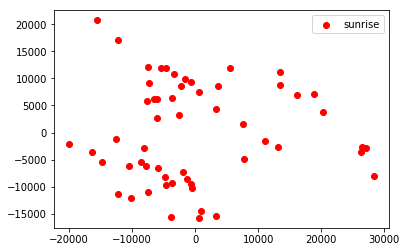

In [55]:
pca = PCA(svd_solver='randomized',n_components=2)
X = pca.fit_transform(data)
df = pd.DataFrame({"x": X[:, 0], "y": X[:, 1], "label":np.where(y==1, "sunset", "sunrise")})
colors = ["red", "yellow"]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    pl.scatter(df[mask]['x'], df[mask]['y'], c=color, label=label)
pl.legend()

In [56]:
X

array([[ -1999.49985383,  -7254.56304811],
       [   635.55978115, -15747.37339698],
       [-12585.94006619,  -1129.48929177],
       [ 11166.65957139,  -1478.18569219],
       [ -7397.67751393,   9175.31878914],
       [ -6513.96634769,   6248.63666399],
       [-15572.34452853,  20730.81559644],
       [-19971.43452519,  -2015.1081599 ],
       [ -7449.07473321,  12085.94751901],
       [ 28336.02000508,  -8040.18020843],
       [  3633.4272769 ,   8660.69906827],
       [-12198.76827661,  17068.22672951],
       [ -4703.66323534,  -8200.90163609],
       [ -3602.27454687,   6306.56808061],
       [ 27120.83254832,  -2764.06526401],
       [ 16123.12353939,   6963.38705036],
       [  7588.78220785,   1636.51806605],
       [ -1631.66239264,   9969.05322201],
       [   628.23821271,   7401.18085727],
       [ -6094.36961602,   6161.33729236],
       [ 13486.03360595,   8696.9214047 ],
       [ -8567.35194788,  -5364.12918954],
       [ -1211.90056482,  -8650.76184396],
       [  3

<h2>RandomizedPCA in 5 dimensions</h2>
<p>Instead of 2 dimenisons, we're going to do RandomizedPCA in 5 dimensions. This will make it a bit harder to visualize, but it will make it easier for some of the classifiers to work with the dataset.</p>

In [57]:
pca = RandomizedPCA(n_components=5)
train_x = pca.fit_transform(train_x)
test_x = pca.transform(test_x)

/home/vm/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


<p>This gives our classifier a nice set of tabular data that we can then use to train the model</p>

In [58]:
train_x[:5]

array([[ -1311.11922076, -10870.31351215,   7926.38018021,   2476.7649986 ,
         -9568.3553938 ],
       [   492.02226217, -18590.66566089,   7975.50443822,   6508.28525551,
         -1339.15227997],
       [-10964.10714947,   5474.8653788 , -14620.2409875 ,   1185.39711496,
          6497.31231575],
       [ -6459.64057407,   3128.61047425,  12601.78326709,   -829.59731307,
         -4110.00581381],
       [-13757.28014181,  23105.6222832 ,   -880.81685849,  -3911.98863557,
         -7358.38834254]])

<p>We're going to be using a <code>K-Nearest Neighbors</code> classifier. Based on our set of training data, we're going to caclulate which training obersvations are closest to a given test point. Whichever class has the most votes wins.</p>

In [59]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
pd.crosstab(test_y, knn.predict(test_x), rownames=["Actual"], colnames=["Predicted"])

Predicted,0
Actual,
0,20


In [61]:
knn.outputs_2d_

False

In [62]:
# string_to_img(new_image)

In [63]:
def string_to_img(image_string):
    print("called string_to_image")
    #we need to decode the image from base64
    image_string = base64.decodestring(image_string)
    #since we're seing this as a JSON string, we use StringIO so it acts like a file
    img = StringIO(image_string)
    img = PIL.Image.open(img)
    img = img.resize(STANDARD_SIZE)
    img = list(img.getdata())
    img = map(list, img)
    img = np.array(img)
    s = img.shape[0] * img.shape[1]
    img_wide = img.reshape(1, s)
    return pca.transform(img_wide[0])

In [64]:
def classify_image(data):
    print("called classify_image")
    preds = knn.predict(data)
    preds = np.where(preds==1, "check", "drivers_license")
    pred = preds[0]
    return {"image_label": pred}

In [65]:
from yhat import Yhat, YhatModel, preprocess

In [66]:
class ImageClassifier(YhatModel):
    REQUIREMENTS = [
      "PIL==1.1.7"
    ]
    
    def execute(self, data):
        print("called execute")
        img_string = data.get("image_as_base64_string", None)
        if img_string is None:
            return {"status": "error", "message": "data was None", "input_data": data}
        else:
            img = string_to_img(img_string)
            pred = classify_image(img)
            return pred

In [67]:
# authenticate
yh = Yhat("USERNAME", "YOUR API KEY", "http://cloud.yhathq.com/")
 
# upload model to yhat
yh.deploy("ImageClassifier", ImageClassifier, globals())

Exception: Failed to authenticate: HTTPConnectionPool(host='cloud.yhathq.com', port=80): Max retries exceeded with url: /verify?username=USERNAME&apikey=YOUR+API+KEY (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x7ff6a471dbe0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))

In [68]:
# i don't have the image data set any more 
# so just some dummy data to get it to work :(
new_image = open("/Users/hernamesbarbara/Desktop/img/1-plot-iris.png", 'rb').read()

#we need to make the image JSON serializeable
new_image = base64.encodestring(new_image)

yh.predict("ImageClassifier", {"image_as_base64_string": new_image})

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hernamesbarbara/Desktop/img/1-plot-iris.png'